<a href="https://colab.research.google.com/github/Cristalreal/Cristalreal/blob/main/ML_Unsupervised_methods_Dimensionality_reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Dimensionality reduction

In this episode we see how higher-dimensional data, such as images of handwritten text or numbers, can be processed with dimensionality reduction techniques to make the datasets more accessible for other modelling techniques.

When dealing with a series of images in machine learning we consider each pixel to be a feature that varies according to each of the sample images. Our previous penguin dataset only had no more than 7 features to train with, however even a small 28x28 MNIST image has as much as 784 features (pixels) to work with.



In [1]:
#import datasets

from sklearn import datasets

# load in dataset as a Pandas Dataframe, return X and Y
features, labels = datasets.load_digits(return_X_y=True, as_frame=True)

print(features.shape, labels.shape)
print(labels)
features.head()

#output shows 1797 different image sof the data with 64 pixels

(1797, 64) (1797,)
0       0
1       1
2       2
3       3
4       4
       ..
1792    9
1793    0
1794    8
1795    9
1796    8
Name: target, Length: 1797, dtype: int64


,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


pixel_0_0     0.0
pixel_0_1     0.0
pixel_0_2     5.0
pixel_0_3    13.0
pixel_0_4     9.0
             ... 
pixel_7_3    13.0
pixel_7_4    10.0
pixel_7_5     0.0
pixel_7_6     0.0
pixel_7_7     0.0
Name: 0, Length: 64, dtype: float64


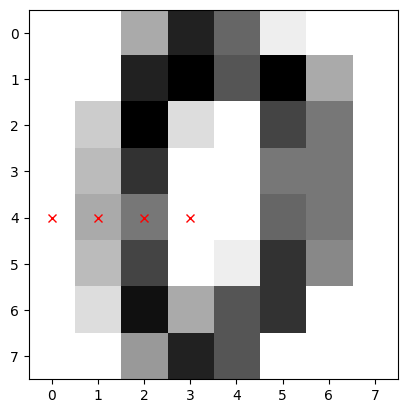

In [2]:
#Our goal: using dimensionality-reduction to help with machine learning
# Let’s see if it is possible to use unsupervised clustering techniques to pull out relations in our MNIST dataset of number images.

#let’s have a quick glance at relationships between our features/pixels. We’ll inspect the relationships between a few pixel features to look for any correlations:
import matplotlib.pyplot as plt
import numpy as np

print(features.iloc[0])
image_1D = features.iloc[0]
image_2D = np.array(image_1D).reshape(-1,8)

plt.imshow(image_2D,cmap="gray_r")
# these points are the pixels we will investigate
# pixels 0,1,2,3 of row 4 of the image
plt.plot([0,1,2,3],[4,4,4,4],"rx")
plt.show()



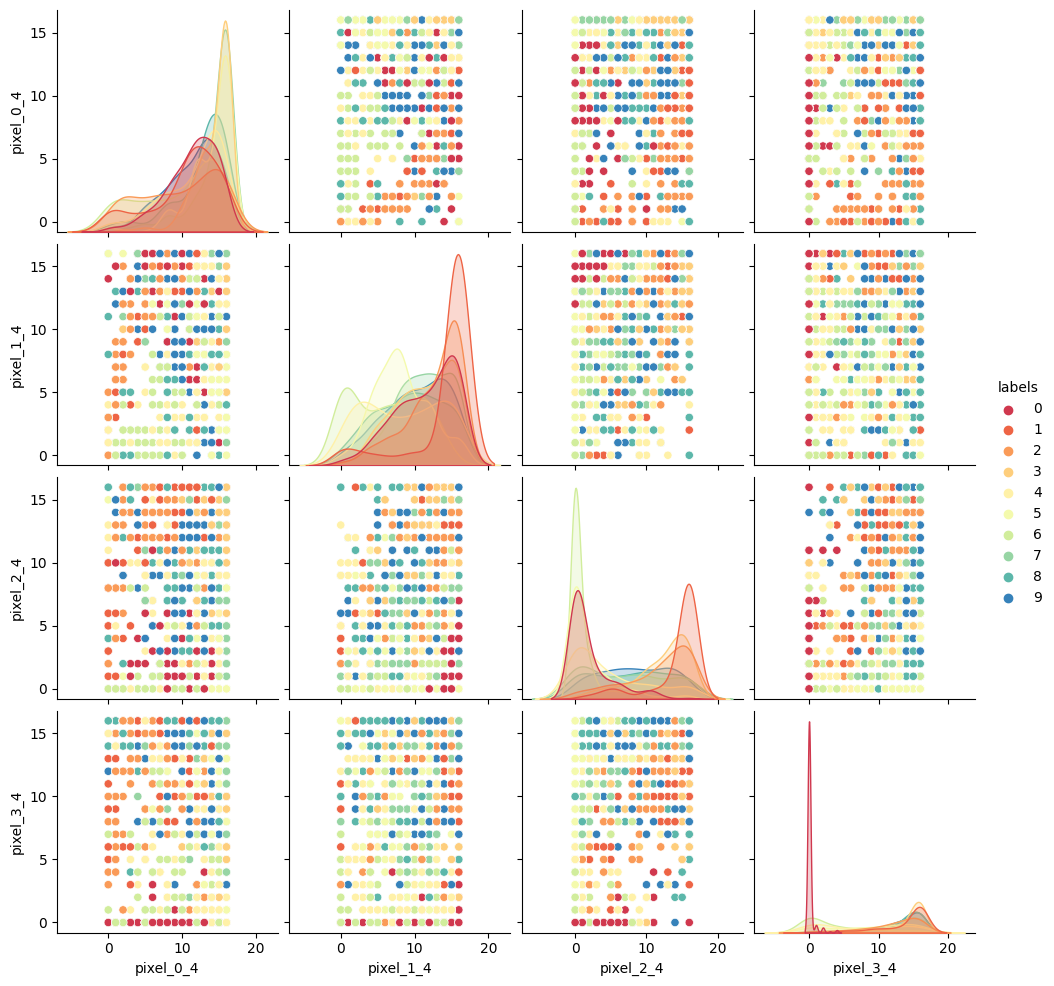

In [3]:
import seaborn as sns

# make a temporary copy of data for plotting here only
seaborn_data = features

# add labels for pairplot color coding
seaborn_data["labels"] = labels

# make a short list of N features for plotting N*N figures
# 4**2 = 16 plots, whereas 64**2 is over 4000!
feature_subset = []
for i in range(4):
    feature_subset.append("pixel_"+str(i)+"_4")

sns.pairplot(seaborn_data, vars=feature_subset, hue="labels",
             palette=sns.mpl_palette("Spectral", n_colors=10))

#the dataset relations are far more complex than our previous examples.
#The histograms show that some numbers appear in those pixel positions more than others, but the feature_vs_feature plots are quite messy to try and decipher.
#There are gaps and patches of colour suggesting that there is some kind of structure there, but it’s far harder to inspect than the penguin data.
#We can’t easily see definitive clusters in our 2D representations, and we know our clustering algorithms will take a long time to try and crunch 64 dimensions at once, so let’s see if we can represent our 64D data in fewer dimensions.

Dimensionality reduction can reduce the complexity of the data and make it easier to work with.

###Principal Component Analysis (PCA)

PCA works by rotating our original set of vectors/axes/features into their principal components i.e. the rotations, around the dataset mean value, that produces the largest variance for our data. There are as many components as there are dimensions, and each principal component is orthoganal to the others.

Essentially, this is just a rotation of our axis (x,y) until variance is maximised for that axis rotation. If we have more than 2 dimensions, then we order the principal components in descending variance order.

PCA allows us to replace our 64 features with a smaller number of dimensional representations that retain the majority of our variance/relational data. Using Scikit-Learn lets apply PCA in a relatively simple way. Let’s apply PCA to the MNIST dataset and retain the two most-major components:

In [4]:
from sklearn import decomposition

# define our model
#PCA with 2 components
#finds the best dimensions that explains the highest/most variance which is most of the information in our model.
pca = decomposition.PCA(n_components=2)

#fit our model
pca.fit(features)

x_pca = pca.transform(features)

#output show the number of samples (x) and the number of dimensions (y)
#This returns us an array of 1797x2 where the 2 remaining columns(our new “features” or “dimensions”) contain vector representations of the first principle components (column 0) and second principle components (column 1) for each of the images.

print(x_pca.shape)

(1797, 2)


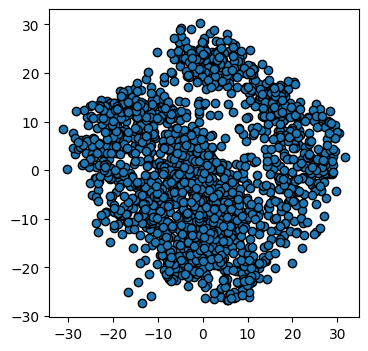

In [5]:
# We can plot these two new features against each other:
import numpy as np
import matplotlib.pyplot as plt

tx = x_pca[:, 0]
ty = x_pca[:, 1]

# without labels
fig = plt.figure(1, figsize=(4, 4))
plt.scatter(tx, ty, edgecolor='k',label=labels)
# output shows a 2D representation of our 64D dataset that we can work with instead.
# 2 highest variance dimesnions plotted against each other
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


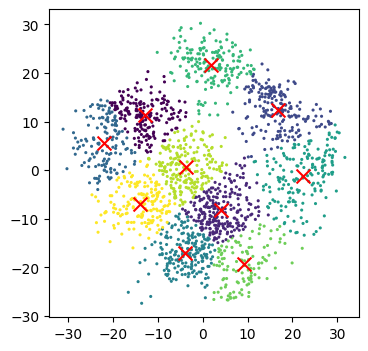

In [6]:
# Let’s try some quick K-means clustering on our 2D representation of the data.
# Because we already have some knowledge about our data we can set k=10 for the 10 digits present in the dataset.

import sklearn.cluster as skl_cluster

Kmean = skl_cluster.KMeans(n_clusters=10)

Kmean.fit(x_pca)
clusters = Kmean.predict(x_pca,labels)

fig = plt.figure(1, figsize=(4, 4))
plt.scatter(tx, ty, s=5, linewidth=0, c=clusters)
for cluster_x, cluster_y in Kmean.cluster_centers_:
    plt.scatter(cluster_x, cluster_y, s=100, c='r', marker='x')
plt.show()

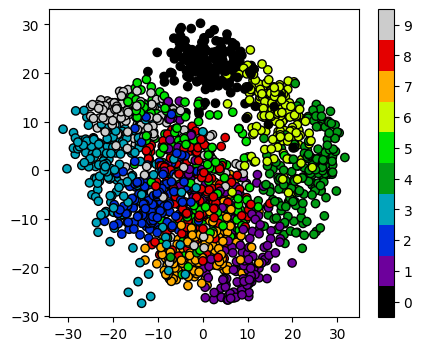

In [7]:
#  now we can compare how these clusters look against our actual image labels by colour coding our first scatter plot:
fig = plt.figure(1, figsize=(5, 4))
plt.scatter(tx, ty, c=labels, cmap="nipy_spectral",
        edgecolor='k',label=labels)
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.show()

PCA has done a valiant effort to reduce the dimensionality of our problem from 64D to 2D while still retaining some of our key structural information. We can see that the digits 0,1,4, and 6 cluster up reasonably well even using a simple k-means test. However it does look like there is still quite a bit of overlap between the remaining digits, especially for the digits 5 and 8. The clustering is from perfect in the largest “blob”, but not a bad effort from PCA given the substantial dimensionality reduction.

It’s worth noting that PCA does not handle outlier data well primarily due to global preservation of structural information, and so we will now look at a more complex form of learning that we can apply to this problem.





# t-distributed Stochastic Neighbor Embedding (t-SNE)

t-SNE is a more powerful and complex example of manifold learning - a non-deterministic non-linear approach to dimensionality reduction. Manifold learning tasks are based on the idea that the dimension of many datasets is artificially high. This is likely the case for our MNIST dataset, as the corner pixels of our images are unlikely to contain digit data, and thus those dimensions are almost negligable compared with others.

The versatility of the algorithm in transforming the underlying structural information into lower-order projections makes t-SNE applicable to a wide range of research domains.

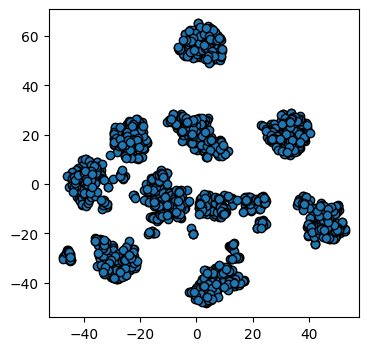

In [8]:
# Lets code and apply t-SNE to the MNIST dataset in the same manner that we did for the PCA example, and reduce the data down from 64D to 2D again:
from sklearn import manifold

# t-SNE embedding
# initialising with "pca" explicitly preserves global structure
tsne = manifold.TSNE(n_components=2, init='pca', random_state = 0)
x_tsne = tsne.fit_transform(features)


fig = plt.figure(1, figsize=(4, 4))
plt.scatter(x_tsne[:, 0], x_tsne[:, 1], edgecolor='k')

#outputs shows that It looks like t-SNE has done a much better job of splitting our data up into clusters using only a 2D representation of the data.
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


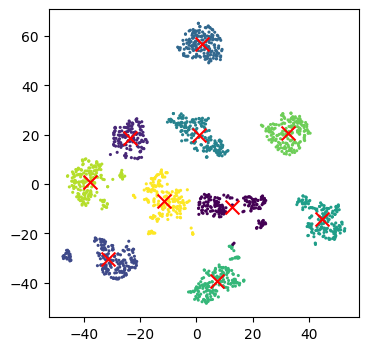

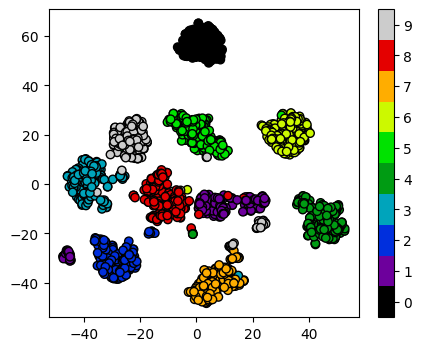

In [9]:
#  let’s run a simple k-means clustering on this new 2D representation, and compare with the actual color-labelled data:

import sklearn.cluster as skl_cluster

Kmean = skl_cluster.KMeans(n_clusters=10)

Kmean.fit(x_tsne)
clusters = Kmean.predict(x_tsne,labels)

fig = plt.figure(1, figsize=(4, 4))
plt.scatter(x_tsne[:,0], x_tsne[:,1], s=5, linewidth=0, c=clusters)
for cluster_x, cluster_y in Kmean.cluster_centers_:
    plt.scatter(cluster_x, cluster_y, s=100, c='r', marker='x')
plt.show()

# with labels
fig = plt.figure(1, figsize=(5, 4))
plt.scatter(x_tsne[:, 0], x_tsne[:, 1], c=labels, cmap="nipy_spectral",
        edgecolor='k',label=labels)
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))

#output shows that It looks like t-SNE has successfully separated out our digits into accurate clusters using as little as a 2D representation and a simple k-means clustering algorithm.
#It has worked so well that you can clearly see several clusters which can be modelled, whereas for our PCA representation we needed to rely heavily on the knowledge that we had 10 types of digits to cluster.

plt.show()

In [12]:
# The above example has considered only two dimensions since humans can visualize two dimensions very well.
#However, there can be cases where a dataset requires more than two dimensions to be appropriately decomposed.
#Modify the above programs to use three dimensions and create appropriate plots.
#Do three dimensions allow one to better distinguish between the digits?



NameError: ignored